# Analysis procedure for HbA1c Analysis

## Setting up Julia Jupyter Kernel

To use Julia on Jupyter Notebook, the package IJulia is needed. Install IJulia from the Julia REPL by pressing ] to enter pkg mode and entering:

```julia
(@v1.5) pkg> add IJulia
```
then
```julia
(@v1.5) pkg> build IJulia
```

Then the Julia kernel will be available on your Jupyter Notebook. 

## Package Installation

The following are the packages used in our analysis:
- Registered packages: CSV, DataFrames, StatsBase, DataStructures, Statistics, Plots, Ipopt, KNITRO (license needed)
- Unregistered packages: SnpArrays, VCFTools, BGEN, WiSER (private), vGWAS (private)

Registered packages can also be installed in the pkg mode of Julia REPL. 
```julia
(@v1.5) pkg> add CSV DataFrames StatsBase DataStructures Statistics Plots Ipopt
```

The vGWAS is the main analysis package. It depends on four other unregistered packages SnpArrays.jl, VCFTools.jl, BGEN.jl, and WiSER.jl. The package has not yet been registered and must be installed using the repository location. Start julia and use the ] key to switch to the package manager REPL and run:

```julia
(@v1.5) pkg> add https://github.com/OpenMendel/SnpArrays.jl
(@v1.5) pkg> add https://github.com/OpenMendel/VCFTools.jl
(@v1.5) pkg> add https://github.com/OpenMendel/BGEN.jl
(@v1.5) pkg> add https://github.com/OpenMendel/WiSER.jl
(@v1.5) pkg> add https://github.com/OpenMendel/vGWAS.jl
```

## Environment setup

The [environment](https://pkgdocs.julialang.org/v1.5/environments/) is defined by `Project.toml` and `Manifest.toml` files located in a certain directory. This is a tool to keep package versions consistent throughout different machines/users. You can copy `Project.toml` and `Manifest.toml` in this directory to your project directory, activate the environment, and instantiate it. KNITRO is not included in this project. In Pkg mode of Julia REPL:

```julia
(@v1.5) pkg> activate PROJECTDIR
(@v1.5) pkg> instantiate
```
where `PROJECTDIR` is the directory in which `Project.toml` and `Manifest.toml` exist. It can be `.` for the current working directory. You will need to run `instantiate` immediately after copying the toml files to your project directory. You will not need to run it thereafter. 
You might want to precompile the packages, especially before running the jobs on a cluster:
```julia
(@v1.5) pkg> precompile
```


In some cases, we might want to update the vGWAS package and possibly others (BGEN package in particular) during the experiment runs. In that case, we will update the toml files in this directory and notify you. Then you will need to copy the updated toml files to your directory then run `instantiate` again in the Pkg mode after activating the environment.



We can also activate environments by running 

In [2]:
#using Pkg
#pkg"activate ."

on Jupyter Notebooks. Running `pkg"..."` after running `using Pkg` is equivalent to running the command `...` on the Pkg mode of REPL.

When running Julia from the command line, you can set up the environment using the command line argument, e.g., 
```sh
julia --project=. test.jl
```

## Reading data files and filtering

In [1]:
using CSV, DataFrames, Dates
datadir = "/xdisk/jzhou/mig2020/rsgrps/jzhou/UKB_48152/pheno/"; # the location where the data files from vGWAS/datasets/UKBclean of Box are stored 

Start with EUR data: 337,138 subjects.

In [6]:
phenotype_info = CSV.read(datadir * "/EUR_detail.txt", DataFrame)
#data_center = CSV.read(datadir * "/assessment_center.csv", DataFrame)
#phenotype_info = leftjoin(phenotype_info, data_center, on=[:FID=>:FID], makeunique=true)
phenotype_info = rename(phenotype_info,  Symbol("f.eid") => :FID)
phenotype_info = select(phenotype_info, :FID, :DOB, :SEX, :BMI, :dm, :age_2010, :date_init,
    :date_first_dm, :date_firstoc_t2d, :date_firstoc_t1d, :age_init, :insulin, :self_insulin, :antidiabetics, 
    Between(:PC1, :PC10))

,FID,DOB,SEX,BMI,dm,age_2010,date_init,date_first_dm
,Int64,Date,String,Float64?,Int64,Int64,Date,Date?
1,1000012,1965-04-01,Male,28.6,0,44,2008-04-01,missing
2,1000031,1957-06-01,Female,25.0,0,52,2010-04-20,missing
3,1000047,1963-04-01,Male,36.8,0,46,2008-02-01,missing
4,1000073,1956-02-01,Male,44.6,0,53,2009-07-20,missing
5,1000085,1944-06-01,Male,26.8,0,65,2008-10-24,missing
6,1000094,1947-08-01,Female,23.6,0,62,2008-07-10,missing
7,1000101,1944-12-01,Male,30.0,0,65,2008-07-15,missing
8,1000119,1964-06-01,Male,30.7,0,45,2009-04-21,missing
9,1000122,1955-04-01,Female,26.1,0,54,2010-05-14,missing


## Filtering out samples with missing covariates

Filtering out subjects with missing covariates we need: `SEX`, `age_2010`, `PC1`, `BMI`

Sex. No missing there. 


In [8]:
using StatsBase

In [10]:
#counts(phenotype_info.SEX)

Age at year 2010. This is later used for age at measurement (age_2010 + year_of_measurement - 2010). No missing again. 

In [11]:
count(isnan.(phenotype_info.age_2010))

0

PC1. no missing again. 

In [12]:
count(isnan.(phenotype_info.PC1))

0

In [13]:
#phenotype_info.BMI = map(x -> x == "NA" ? missing : parse(Float64, x), phenotype_info.BMI)
phenotype_info = filter(x -> x.BMI !== missing, phenotype_info)

,FID,DOB,SEX,BMI,dm,age_2010,date_init,date_first_dm
,Int64,Date,String,Float64?,Int64,Int64,Date,Date?
1,1000012,1965-04-01,Male,28.6,0,44,2008-04-01,missing
2,1000031,1957-06-01,Female,25.0,0,52,2010-04-20,missing
3,1000047,1963-04-01,Male,36.8,0,46,2008-02-01,missing
4,1000073,1956-02-01,Male,44.6,0,53,2009-07-20,missing
5,1000085,1944-06-01,Male,26.8,0,65,2008-10-24,missing
6,1000094,1947-08-01,Female,23.6,0,62,2008-07-10,missing
7,1000101,1944-12-01,Male,30.0,0,65,2008-07-15,missing
8,1000119,1964-06-01,Male,30.7,0,45,2009-04-21,missing
9,1000122,1955-04-01,Female,26.1,0,54,2010-05-14,missing


In [14]:
#phenotype_info.self_bpdrugs = map(x -> x == "NA" ? missing : parse(Int, x), phenotype_info.self_bpdrugs)
#phenotype_info = filter(x -> x.self_bpdrugs !== missing, phenotype_info)

## Read in hba1c data

In [14]:
a1c_info = CSV.read(datadir * "/pc_biomarkers/hba1c_cleaned_all.txt", DataFrame)
#a1c_info = rename(a1c_info,  Symbol("v\"eid\"") => :FID)
sort!(a1c_info, [:FID, :prim_a1c_date])

,FID,IID,prim_a1c_date,data_provider,terminology,code,hba1c_percent
,Int64,Int64,Date,Int64,String,String,Float64
1,1000029,1000029,2017-10-25,3,read3,XaPbt,4.8
2,1000029,1000029,2018-09-27,3,read3,XaPbt,5.0
3,1000068,1000068,2017-02-21,3,read3,XaPbt,5.4
4,1000068,1000068,2018-02-06,3,read3,XaPbt,5.2
5,1000068,1000068,2019-02-08,3,read3,XaPbt,5.3
6,1000068,1000068,2020-01-17,3,read3,XaPbt,5.2
7,1000094,1000094,2016-04-18,3,read3,XaPbt,5.9
8,1000094,1000094,2019-02-27,3,read3,XaPbt,5.7
9,1000160,1000160,2016-02-25,3,read3,XaPbt,5.9


Need to remove the records that are only allowed to be used for COVID-19 research.

In [30]:
a1c_info = filter(x -> x.covid19_only !== 1, a1c_info)

,FID,IID,prim_a1c_date,data_provider,terminology,code,hba1c_percent
,Int64,Int64,Date,Int64,String,String,Float64
1,1000094,1000094,2016-04-18,3,read3,XaPbt,5.9
2,1000160,1000160,2016-02-25,3,read3,XaPbt,5.9
3,1000187,1000187,2014-08-26,1,read2,42W5.,5.5
4,1000214,1000214,2015-03-04,3,read3,XaPbt,5.6
5,1000243,1000243,2014-01-06,3,read3,XaPbt,6.4
6,1000295,1000295,2015-12-29,3,read3,XaPbt,5.3
7,1000454,1000454,2009-11-02,3,read3,XaERp,5.7
8,1000454,1000454,2012-02-27,3,read3,XaERp,5.7
9,1000454,1000454,2013-08-23,3,read3,XaERp,5.6


Number of subjects with a1c data: 

In [31]:
length(unique(a1c_info[!, :FID]))

106304

## Join a1c data with phenotypes

Inner join a1c_info and phenotype_info.

In [32]:
@time a1c_info_joined = innerjoin(a1c_info, phenotype_info, on=[:FID=>:FID], makeunique=true)

  0.187658 seconds (801 allocations: 167.457 MiB)


,FID,IID,prim_a1c_date,data_provider,terminology,code,hba1c_percent
,Int64,Int64,Date,Int64,String,String,Float64
1,1000094,1000094,2016-04-18,3,read3,XaPbt,5.9
2,1000187,1000187,2014-08-26,1,read2,42W5.,5.5
3,1000214,1000214,2015-03-04,3,read3,XaPbt,5.6
4,1000295,1000295,2015-12-29,3,read3,XaPbt,5.3
5,1000526,1000526,2011-08-21,3,read3,XaERp,6.1
6,1000526,1000526,2014-05-29,3,read3,XaERp,6.1
7,1000526,1000526,2015-07-23,3,read3,XaERp,6.2
8,1000526,1000526,2016-01-22,3,read3,XaERp,6.0
9,1000602,1000602,2004-08-04,3,read3,XaERp,5.7


Filter out rows with no phenotype information (non-EUR or missing BMI, etc.)

In [29]:
#3826217 - 2590073

In [34]:
#a1c_info_joined1 = filter(x -> x.EUR !== missing, a1c_info_joined)

Number of subjects:

In [33]:
length(unique(a1c_info_joined.FID))

70995

## Cleaning measurement dates and age at measurements

In [34]:
a1c_info_joined = filter(x -> x.prim_a1c_date != "NA", a1c_info_joined)

,FID,IID,prim_a1c_date,data_provider,terminology,code,hba1c_percent
,Int64,Int64,Date,Int64,String,String,Float64
1,1000094,1000094,2016-04-18,3,read3,XaPbt,5.9
2,1000187,1000187,2014-08-26,1,read2,42W5.,5.5
3,1000214,1000214,2015-03-04,3,read3,XaPbt,5.6
4,1000295,1000295,2015-12-29,3,read3,XaPbt,5.3
5,1000526,1000526,2011-08-21,3,read3,XaERp,6.1
6,1000526,1000526,2014-05-29,3,read3,XaERp,6.1
7,1000526,1000526,2015-07-23,3,read3,XaERp,6.2
8,1000526,1000526,2016-01-22,3,read3,XaERp,6.0
9,1000602,1000602,2004-08-04,3,read3,XaERp,5.7


In [35]:
length(unique(a1c_info_joined.FID))

70995

Obtain year of measurement and age at measurement:

In [36]:
a1c_info_joined.year_of_measurement = map(x ->  Dates.year(x.prim_a1c_date), eachrow(a1c_info_joined))

312760-element Array{Int64,1}:
 2016
 2014
 2015
 2015
 2011
 2014
 2015
 2016
 2004
 2005
 2007
 2007
 2010
    ⋮
 2015
 2017
 2016
 2015
 2013
 2014
 2015
 2015
 2016
 2016
 2015
 2015

In [37]:
a1c_info_joined.age_at_measurement = map(x -> x.age_2010 + x.year_of_measurement - 2010, eachrow(a1c_info_joined));

Special meaning for year 1901 1902, and 1903, 2037

https://biobank.ndph.ox.ac.uk/showcase/coding.cgi?tk=68EMKkCB8skqob929k0lJTa0eLbPoYnY157881&id=819


| Date | Meaning |
|:---|:---|
| 1900-01-01 |	Code has no event date |
| 1901-01-01 |	Code has event date before participant's date of birth |
| 1902-02-02 |	Code has event date matching participant's date of birth |
| 1903-03-03 |	Code has event date after participant's date of birth and falls in the same calendar year as date of birth |
| 2037-07-07 |	Code has event date in the future and is presumed to be a place-holder or other system default |

We remove them. 

In [38]:
minimum(a1c_info_joined.age_at_measurement)

-62

In [39]:
maximum(a1c_info_joined.age_at_measurement)

97

In [40]:
yom_map = countmap(a1c_info_joined.year_of_measurement);
for v in sort(yom_map)
    println(v)
end

1902 => 3
1903 => 2
1950 => 1
1990 => 4
1991 => 10
1992 => 22
1993 => 67
1994 => 88
1995 => 153
1996 => 245
1997 => 393
1998 => 615
1999 => 852
2000 => 1409
2001 => 2256
2002 => 3562
2003 => 5276
2004 => 7651
2005 => 9093
2006 => 10299
2007 => 11540
2008 => 13006
2009 => 14373
2010 => 16176
2011 => 18175
2012 => 23522
2013 => 35313
2014 => 43599
2015 => 52588
2016 => 34847
2017 => 7618
2037 => 2


In [41]:
a1c_info_joined = filter(x -> 1940 <= x.year_of_measurement <= 2017, a1c_info_joined)

,FID,IID,prim_a1c_date,data_provider,terminology,code,hba1c_percent
,Int64,Int64,Date,Int64,String,String,Float64
1,1000094,1000094,2016-04-18,3,read3,XaPbt,5.9
2,1000187,1000187,2014-08-26,1,read2,42W5.,5.5
3,1000214,1000214,2015-03-04,3,read3,XaPbt,5.6
4,1000295,1000295,2015-12-29,3,read3,XaPbt,5.3
5,1000526,1000526,2011-08-21,3,read3,XaERp,6.1
6,1000526,1000526,2014-05-29,3,read3,XaERp,6.1
7,1000526,1000526,2015-07-23,3,read3,XaERp,6.2
8,1000526,1000526,2016-01-22,3,read3,XaERp,6.0
9,1000602,1000602,2004-08-04,3,read3,XaERp,5.7


In [42]:
length(unique(a1c_info_joined.FID))

70995

In [43]:
minimum(a1c_info_joined.age_at_measurement)

3

In [44]:
maximum(a1c_info_joined.age_at_measurement)

79

Ages at measurement with the remaining data lies between 3-79, which is way more reasonable.

Finally, we filter out patients with suspicious measurements. [TODO] 

The following placeholder code removes subjects with >150 measurements, but eventually we will make the decision after actually reading the data manually.

In [28]:
using DataStructures

In [29]:
# d = countmap(bp_info_joined.FID)
# to_exclude = DefaultDict{Int, Bool}(false)
# for (k, v) in d
#     if v > 150
#         to_exclude[k] = true
#     end
# end

In [30]:
# length(to_exclude)

In [62]:
#2583117-2537295

In [32]:
# bp_info_joined = filter(x -> !to_exclude[x.FID], bp_info_joined)

In [63]:
#length(unique(bp_info_joined.FID)) # remaining subjects

## Shifting

To add a fixed value to HbA1c for samples with glucose-lowering medication? Insulin, antidiabetics?

In [34]:
#bp_info_joined[!, :sbp_shifted] = map(x -> x.self_bpdrugs == 1 ? x.Systolic_bp_pc + 15.0 :
#                               x.Systolic_bp_pc, eachrow(bp_info_joined))
#bp_info_joined[!, :dbp_shifted] = map(x -> x.self_bpdrugs == 1 ? x.Diastolic_bp_pc + 10.0 :
#                               x.Diastolic_bp_pc, eachrow(bp_info_joined));

## Standardization

We compute standardized age, bmi, etc. before splitting diabetic and nondiabetic samples.  

In [45]:
using Statistics
standardizes(x) = (x .- mean(skipmissing(x))) ./ std(skipmissing(x))
a1c_info_joined[!, :std_age] = standardizes(a1c_info_joined[!, :age_at_measurement])
a1c_info_joined[!, :std_age_sq] = map(x -> x.std_age ^ 2, eachrow(a1c_info_joined))
a1c_info_joined[!, :std_bmi] = standardizes(a1c_info_joined[!, :BMI])
a1c_info_joined[!, :std_a1c] = standardizes(a1c_info_joined[!, :hba1c_percent])

312753-element Array{Float64,1}:
 -0.6204637405486043
 -0.9063654067297823
 -0.8348899901844881
 -1.0493162398203713
 -0.4775129074580159
 -0.4775129074580159
 -0.4060374909127211
 -0.5489883240033101
 -0.7634145736391933
 -0.4060374909127211
 -0.1916112412768379
 -0.1916112412768379
  0.23724125799492848
  ⋮
 -0.9778408232750765
 -0.9778408232750765
 -1.1207916563656655
 -0.8348899901844881
 -0.4775129074580159
 -0.6919391570938991
 -0.2630866578221321
 -0.4060374909127211
 -0.6919391570938991
 -1.1207916563656655
 -1.2637424894562546
 -1.4781687390921376

## Split

Write out the data without splitting.

In [46]:
CSV.write("a1c_all.csv", a1c_info_joined)

"a1c_all.csv"

Now we split the data into diabetic samples and nondiabetic samples. 

In [70]:
diabetics = CSV.read(datadir * "/diabetics_detail.txt", DataFrame)
diabetics = rename(diabetics,  Symbol("f.eid") => :FID)
diabetics = diabetics[!, :FID]
using DataStructures
diabetics_map = DefaultDict{Int, Bool}(false)
for v in diabetics
    diabetics_map[v] = true
end

In [72]:
a1c_info_diabetics = filter(x -> diabetics_map[x.FID], a1c_info_joined)

,FID,IID,prim_a1c_date,data_provider,terminology,code,hba1c_percent
,Int64,Int64,Date,Int64,String,String,Float64
1,1000602,1000602,2004-08-04,3,read3,XaERp,5.7
2,1000602,1000602,2005-09-19,3,read3,XaERp,6.2
3,1000602,1000602,2007-04-13,3,read3,XaERp,6.5
4,1000602,1000602,2007-04-27,3,read3,XaERp,6.5
5,1000602,1000602,2010-06-15,3,read3,XaERp,7.1
6,1000602,1000602,2011-05-13,3,read3,XaERp,6.4
7,1000602,1000602,2011-05-27,3,read3,XaERp,6.5
8,1000602,1000602,2012-05-03,3,read3,XaERp,5.7
9,1001084,1001084,1997-05-08,3,read3,XaERp,5.6


Number of patients remaining:

In [74]:
length(unique(a1c_info_diabetics.FID))

13800

In [75]:
d = countmap(a1c_info_diabetics.FID)
diabetic_measurements = []
for (k, v) in d
    push!(diabetic_measurements, v)
end

In [76]:
using Statistics

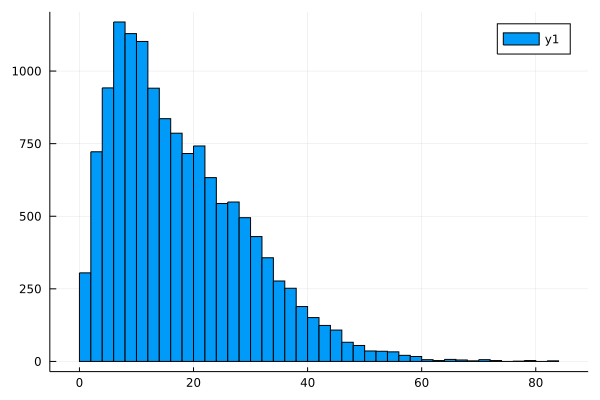

In [77]:
using Plots
histogram(diabetic_measurements)

In [78]:
CSV.write("a1c_diabetics.csv", a1c_info_diabetics)

"a1c_diabetics.csv"

In [79]:
a1c_info_nondiabetics = filter(x -> !diabetics_map[x.FID], a1c_info_joined)

,FID,IID,prim_a1c_date,data_provider,terminology,code,hba1c_percent
,Int64,Int64,Date,Int64,String,String,Float64
1,1000094,1000094,2016-04-18,3,read3,XaPbt,5.9
2,1000187,1000187,2014-08-26,1,read2,42W5.,5.5
3,1000214,1000214,2015-03-04,3,read3,XaPbt,5.6
4,1000214,1000214,2017-12-20,3,read3,XaPbt,5.6
5,1000214,1000214,2017-12-29,3,read3,XaPbt,5.6
6,1000295,1000295,2015-12-29,3,read3,XaPbt,5.3
7,1000295,1000295,2017-01-26,3,read3,XaPbt,5.3
8,1000381,1000381,2017-12-11,3,read3,XaPbt,5.4
9,1000397,1000397,2014-10-14,3,read3,XaPbt,5.5


The number of non-diabetic samples remaining:

In [81]:
length(unique(a1c_info_nondiabetics.FID))

82602

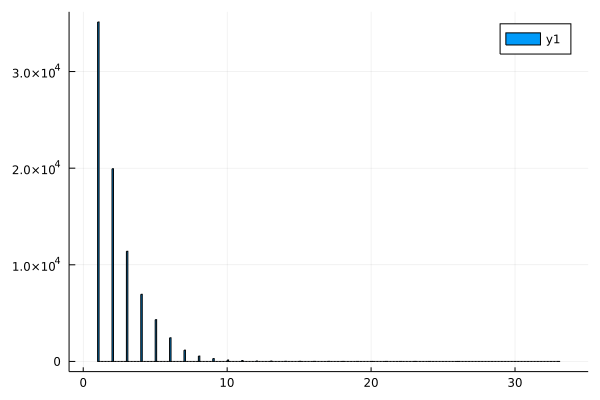

In [82]:
d = countmap(a1c_info_nondiabetics.FID)
nondiabetic_measurements = []
for (k, v) in d
    push!(nondiabetic_measurements, v)
end
histogram(nondiabetic_measurements)

In [83]:
CSV.write("a1c_nondiabetics.csv", a1c_info_nondiabetics)

"a1c_nondiabetics.csv"

In [84]:
using CSV, DataFrames
df = CSV.read("a1c_nondiabetics.csv", DataFrame)

,FID,IID,prim_a1c_date,data_provider,terminology,code,hba1c_percent
,Int64,Int64,Date,Int64,String,String,Float64
1,1000094,1000094,2016-04-18,3,read3,XaPbt,5.9
2,1000187,1000187,2014-08-26,1,read2,42W5.,5.5
3,1000214,1000214,2015-03-04,3,read3,XaPbt,5.6
4,1000214,1000214,2017-12-20,3,read3,XaPbt,5.6
5,1000214,1000214,2017-12-29,3,read3,XaPbt,5.6
6,1000295,1000295,2015-12-29,3,read3,XaPbt,5.3
7,1000295,1000295,2017-01-26,3,read3,XaPbt,5.3
8,1000381,1000381,2017-12-11,3,read3,XaPbt,5.4
9,1000397,1000397,2014-10-14,3,read3,XaPbt,5.5


In [85]:
using StatsBase

In [86]:
d = countmap(df.FID)
nondiabetic_measurements = []
for (k, v) in d
    if v > 200
        println(k)
    end
    push!(nondiabetic_measurements, v)
end
#histogram(nondiabetic_measurements)

In [93]:
diabetic_samples = unique(a1c_info_diabetics.FID);
nondiabetic_samples = unique(a1c_info_nondiabetics.FID);

In [88]:
io = open("diabetes_subjects_a1c.txt", "w")
for v in diabetic_samples
    println(io, v)
end
close(io)

In [89]:
io = open("nondiabetes_subjects_a1c.txt", "w")
for v in nondiabetic_samples
    println(io, v)
end
close(io)

In [90]:
length(nondiabetic_samples)

82602

In [91]:
#unique(a1c_info_joined[!, :center])

In [92]:
#unique(data_center[!, :center])

## Fitting the null model

Content of null_fitter_dbp_diabetes.jl: 

```julia
using DataFrames, CSV
using Statistics
using vGWAS
using Ipopt, WiSER
using LinearAlgebra
using KNITRO
using BGEN
# fit the null model
BLAS.set_num_threads(1)
solver = KNITRO.KnitroSolver(outlev=3) # outlev 0-6

genetic_iids_subsample = CSV.read("diabetes_subjects_bp.txt", DataFrame; header=false)[!, 1]


bp_data = CSV.read("bp_diabetics.csv", DataFrame)
genetic_iids_subsample = unique(bp_data.FID)
@time nm = vgwas(@formula(std_dbp ~ 1 + SEX + std_age + std_age_sq +
        PC1 + PC2 + PC3 + PC4 + PC5 + std_bmi),
    @formula(std_dbp ~ 1 + std_age),
    @formula(std_dbp ~ 1 + SEX + std_age + std_age_sq +
        PC1 + PC2 + PC3 + PC4 + PC5 +
        std_bmi),
    :IID,
    bp_data,
    nothing;
    nullfile="dbp.test.diabetics.null.txt",
    solver=solver,
    runs=10
)

println(nm)
using Serialization
open("fittednullmodel.dbp.test.diabetics.jls", "w") do io
    Serialization.serialize(io, nm)
end
```
- change `std_dbp` to `std_sbp` for analyzing sbp
- change `diabetes` or `diabetics` to `nondiabetics` or `nondiabetes` for analyzing non-diabetes participants
- Knitro is a commercial library installed on Hua's desktop. We decided to fit the null model only on Hua's machine, and when Aubrey needs to fit a null model, the data or the fitted null models will be shared through Box. 

## Running vGWAS on a cluster

The julia script for actual score test (scoretest_bp.jl) for a piece of BGEN file:

```julia
using DataFrames, CSV
using Statistics
using vGWAS
using WiSER
using LinearAlgebra
using BGEN
# fit the null model
BLAS.set_num_threads(1)


using Serialization

bgendir = ARGS[1] # ../ukb_imputed
chr = ARGS[2] # 1 to 22
fitted_null = ARGS[3] # "fittednullmodel.sbp.test.diabetics.jls"
pvalfile = ARGS[4] # "sbp.test.diabetics.chr$(chr).txt"
chunkidx = parse(Int, ARGS[5])
nchunks  = parse(Int, ARGS[6])

nm = open(deserialize, fitted_null)
genetic_iids_subsample = nm.ids

bgenfilename = bgendir * "/ukb_imp_chr$(chr)_v3"
samplefilename = bgendir * "/ukb48152_imp_chr$(chr)_v3_s487317.sample"
mfifilename = bgendir * "/ukb_mfi_chr$(chr)_v3.txt"
ukb_data = Bgen(bgenfilename * ".bgen"; sample_path = samplefilename)
genetic_iids = map(x -> parse(Int, split(x, " ")[1]), samples(ukb_data))

order_dict = Dict{Int, Int}()
for (i, iid) in enumerate(genetic_iids)
    order_dict[iid] = i
end

# sort!(bp_data, order(:IID, by=x -> order_dict[x]))

sample_indicator = falses(length(genetic_iids))
for v in genetic_iids_subsample
    sample_indicator[order_dict[v]] = true
end

# GWAS for each chromosome


min_maf = 0.002
min_info_score = 0.3
min_hwe_pval = 1e-10


mfi = CSV.read(mfifilename, DataFrame; header=false)
mfi.Column8 = map(x -> x == "NA" ? NaN : parse(Float64, x), mfi.Column8) # Column8: info score
snpmask = (mfi.Column6 .> min_maf) .& (mfi.Column8 .> 0.3) # Column6: MAF

chunksize = n_variants(ukb_data) ÷ nchunks + (n_variants(ukb_data) % nchunks > 0 ? 1 : 0)
startidx = chunksize * (chunkidx - 1) + 1
endidx = min(chunksize * chunkidx, n_variants(ukb_data))
snpmask = snpmask[startidx:endidx]

println("running for variants $startidx to $endidx")

# rearrange data in nm so that it matches bgen data
nullinds = indexin(genetic_iids[sample_indicator], nm.ids)
nm.obswts .= isempty(nm.obswts) ? nm.obswts : nm.obswts[nullinds]
nm.ids .= nm.ids[nullinds]
nm.nis .= nm.nis[nullinds]
nm.data .= nm.data[nullinds]
@assert genetic_iids[sample_indicator] == nm.ids "there is some issue -- sampleids not matching"
    
vgwas(nm, bgenfilename * ".bgen", count(sample_indicator);
    samplepath=samplefilename,
    pvalfile=pvalfile,
    snpinds=snpmask,
    min_hwe_pval = min_hwe_pval,
    bgenrowinds = sample_indicator,
    startidx = startidx,
    endidx = endidx,
    usespa=true)

```

- Command-line arguments
    - Argument 1: directory for the BGEN files. BGEN files (.bgen), BGEN index files (.bgen.bgi), and MFI files (.txt) should be included there.
    - Argument 2: chromosome
    - Argument 3: fitted null model (.jls)
    - Argument 4: path for the result p-value file
    - Argument 5: chunk index (1-based)
    - Argument 6: number of chunks
    
The code above runs the analysis on `ARGS[5]`-th slice out of `ARGS[6]` slices of chromosome `ARGS[2]`.

The following is the Hoffman2 jobscript using job array feature of Univa Grid Engine: (`sbp_diabetes.sh`)

```bash
#!/bin/bash
#$ -cwd
# error = Merged with joblog
#$ -o joblog.$JOB_ID.$TASK_ID
#$ -j y
#$ -pe shared 2
#$ -l h_rt=8:00:00,h_data=8G,arch=intel*
# Email address to notify
##$ -M $USER@mail
# Notify when
#$ -m a
#  Job array indexes
#$ -t 1-352:1

NCHUNKS=16
CHUNKIDX=$(( (${SGE_TASK_ID} - 1) % ${NCHUNKS} + 1 ))
CHR=$(( (${SGE_TASK_ID} - 1) / ${NCHUNKS} + 1))

PROJECTDIR=/u/home/k/kose/project-biostat-chair/bp/jobscripts
BGENDIR=/u/home/k/kose/project-biostat-chair/imputed
FITTED_NULL=/u/home/k/kose/project-biostat-chair/bp/fittednullmodel.sbp.test.diabetics.jls
PVALFILE=/u/home/k/kose/project-biostat-chair/bp/pvalfiles/sbp.test.diabetes.chr${CHR}.${CHUNKIDX}of${NCHUNKS}.txt

. /u/local/Modules/default/init/modules.sh
echo $CHUNKIDX
echo $CHR
echo $PVALFILE
module load julia/1.5.4
time julia --project=${PROJECTDIR} ${PROJECTDIR}/scoretest_bp.jl ${BGENDIR} ${CHR} ${FITTED_NULL} ${PVALFILE} ${CHUNKIDX} ${NCHUNKS}
```

The following is to rerun some of the jobs in case some of the jobs fail. 

```bash
#!/bin/bash
#$ -cwd
# error = Merged with joblog
#$ -o joblog.$JOB_ID.$TASK_ID
#$ -j y
#$ -pe shared 2
#$ -l h_rt=4:00:00,h_data=8G,arch=intel*
# Email address to notify
##$ -M $USER@mail
# Notify when
#$ -m a
#  Job array indexes (1 to number of jobs to run)
#$ -t 1-4:1

# an array of jobs to run again
TASK_IDS=(2 8 19 33)
# shell array indexing is 0-based
IDX=$(( ${SGE_TASK_ID} - 1 ))
TASK_ID=${TASK_IDS[IDX]}

NCHUNKS=16
CHUNKIDX=$(( (${TASK_ID} - 1) % ${NCHUNKS} + 1 ))
CHR=$(( (${TASK_ID} - 1) / ${NCHUNKS} + 1))

PROJECTDIR=/u/home/k/kose/project-biostat-chair/bp/jobscripts
BGENDIR="/u/home/k/kose/project-biostat-chair/imputed"
FITTED_NULL="/u/home/k/kose/project-biostat-chair/bp/fittednullmodel.dbp.run1.nondiabetics.jls"
PVALFILE=/u/home/k/kose/project-biostat-chair/bp/pvalfiles/dbp.run1.nondiabetes.chr${CHR}.${CHUNKIDX}of${NCHUNKS}.txt

echo $CHR
echo $CHUNKIDX
. /u/local/Modules/default/init/modules.sh
echo $PVALFILE
module load julia/1.5.4
time julia --project=${PROJECTDIR} ${PROJECTDIR}/scoretest_bp.jl ${BGENDIR} ${CHR} ${FITTED_NULL} ${PVALFILE} ${CHUNKIDX} ${NCHUNKS}
```

This scripts runs the analysis by splitting each chromosome into 16 slices. It can be modified by changing the number 352 in line 13 to 16 * (number_of_slices) and changing 16 in line 15 to (number_of_slices).  
The jobs should be submitted via
```sh
qsub sbp_diabetes.sh
```